# Project Name: Lube 500N Grade Production Prediction

In this Project, will predict L500N overall production and will try to optimise/maximise it using different important parameters with the help of Regression Models and then comparing the results i.e. which model is predicting much efficiently.

# Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Getting Data

In [6]:
prod= pd.read_csv('datasets\lube 500 n production prediction csv.csv')
prod.head()

,Lube pdt to Storage,DW Feed,CAT R204,CATR205,Gas to Oil,System Pressure,Stripping Steam to C224,F206 HOT,Stripping Steam to C225,C225 Top Reflux,Lube by pdt to storage,Lt Lube to Storage,Lube by pdt draw off temp,Lt Lube draw off temp,Lube pdt draw off temp,C225 Column Temp,C225 Column Pressure,Lube pdt Online KV@40 deg C
0,1142.4,1341.6,346.5,243.3,403.7,156.3,47.0,330.0,3.0,899.3,35.0,120.7,103.3,263.6,324.8,53.7,43.6,105.6
1,1191.9,1358.6,346.6,244.7,397.7,156.4,47.0,330.1,3.0,900.8,35.1,120.4,103.9,264.0,325.2,53.6,42.9,106.0
2,1193.6,1354.6,345.8,241.0,398.7,157.6,47.0,329.9,3.0,898.3,35.0,124.8,103.8,264.4,325.2,53.6,42.7,109.4
3,1161.1,1338.7,346.5,239.0,402.1,160.0,45.0,330.0,3.0,799.9,34.9,125.6,107.7,266.3,325.2,53.3,42.7,108.0
4,1162.5,1361.7,346.1,238.3,390.4,158.1,45.0,329.7,3.0,800.0,35.0,125.1,109.3,265.4,324.8,52.9,42.4,106.1


# Exploratory Data Analysis

In [4]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lube pdt to Storage          567 non-null    float64
 1   DW Feed                      567 non-null    float64
 2   CAT R204                     567 non-null    float64
 3   CATR205                      567 non-null    float64
 4   Gas to Oil                   567 non-null    float64
 5   System Pressure              567 non-null    float64
 6   Stripping Steam to C224      567 non-null    float64
 7   F206 HOT                     567 non-null    float64
 8   Stripping Steam to C225      567 non-null    float64
 9   C225 Top Reflux              567 non-null    float64
 10  Lube by pdt to storage       567 non-null    float64
 11  Lt Lube to Storage           567 non-null    float64
 12  Lube by pdt draw off temp    567 non-null    float64
 13  Lt Lube draw off tem

In [7]:
prod.describe()

,Lube pdt to Storage,DW Feed,CAT R204,CATR205,Gas to Oil,System Pressure,Stripping Steam to C224,F206 HOT,Stripping Steam to C225,C225 Top Reflux,Lube by pdt to storage,Lt Lube to Storage,Lube by pdt draw off temp,Lt Lube draw off temp,Lube pdt draw off temp,C225 Column Temp,C225 Column Pressure,Lube pdt Online KV@40 deg C
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,1151.228571,1343.130688,344.621517,234.137390,402.159788,157.258907,44.467372,330.496473,2.797884,774.746914,33.860670,126.308289,108.423280,245.192416,324.832981,51.534392,47.910582,94.803351
std,58.004028,28.010403,2.741932,4.137715,9.203303,1.083112,4.145006,2.151116,0.310356,56.659642,16.880124,33.138110,7.070047,22.659200,2.350345,5.032383,2.579361,5.539700
min,677.200000,1043.900000,336.100000,217.800000,324.900000,144.800000,34.900000,311.600000,1.000000,650.000000,10.000000,35.000000,79.500000,203.700000,308.300000,40.000000,41.300000,85.100000
25%,1125.750000,1343.300000,342.700000,231.000000,399.400000,156.800000,43.000000,330.000000,2.500000,720.400000,23.000000,100.000000,102.950000,228.550000,323.600000,47.450000,46.300000,91.000000
50%,1154.800000,1349.500000,344.600000,233.700000,402.300000,157.300000,46.000000,330.900000,3.000000,799.300000,27.300000,145.500000,106.900000,242.800000,325.000000,51.200000,48.200000,92.800000
75%,1189.550000,1353.400000,346.200000,237.000000,405.200000,157.800000,46.000000,331.100000,3.000000,800.400000,35.700000,149.850000,114.450000,255.300000,326.100000,55.900000,49.700000,97.100000
max,1259.400000,1381.600000,350.900000,244.700000,489.000000,161.000000,52.000000,334.400000,3.100000,949.100000,106.900000,156.300000,126.600000,301.100000,330.000000,63.300000,54.300000,111.900000


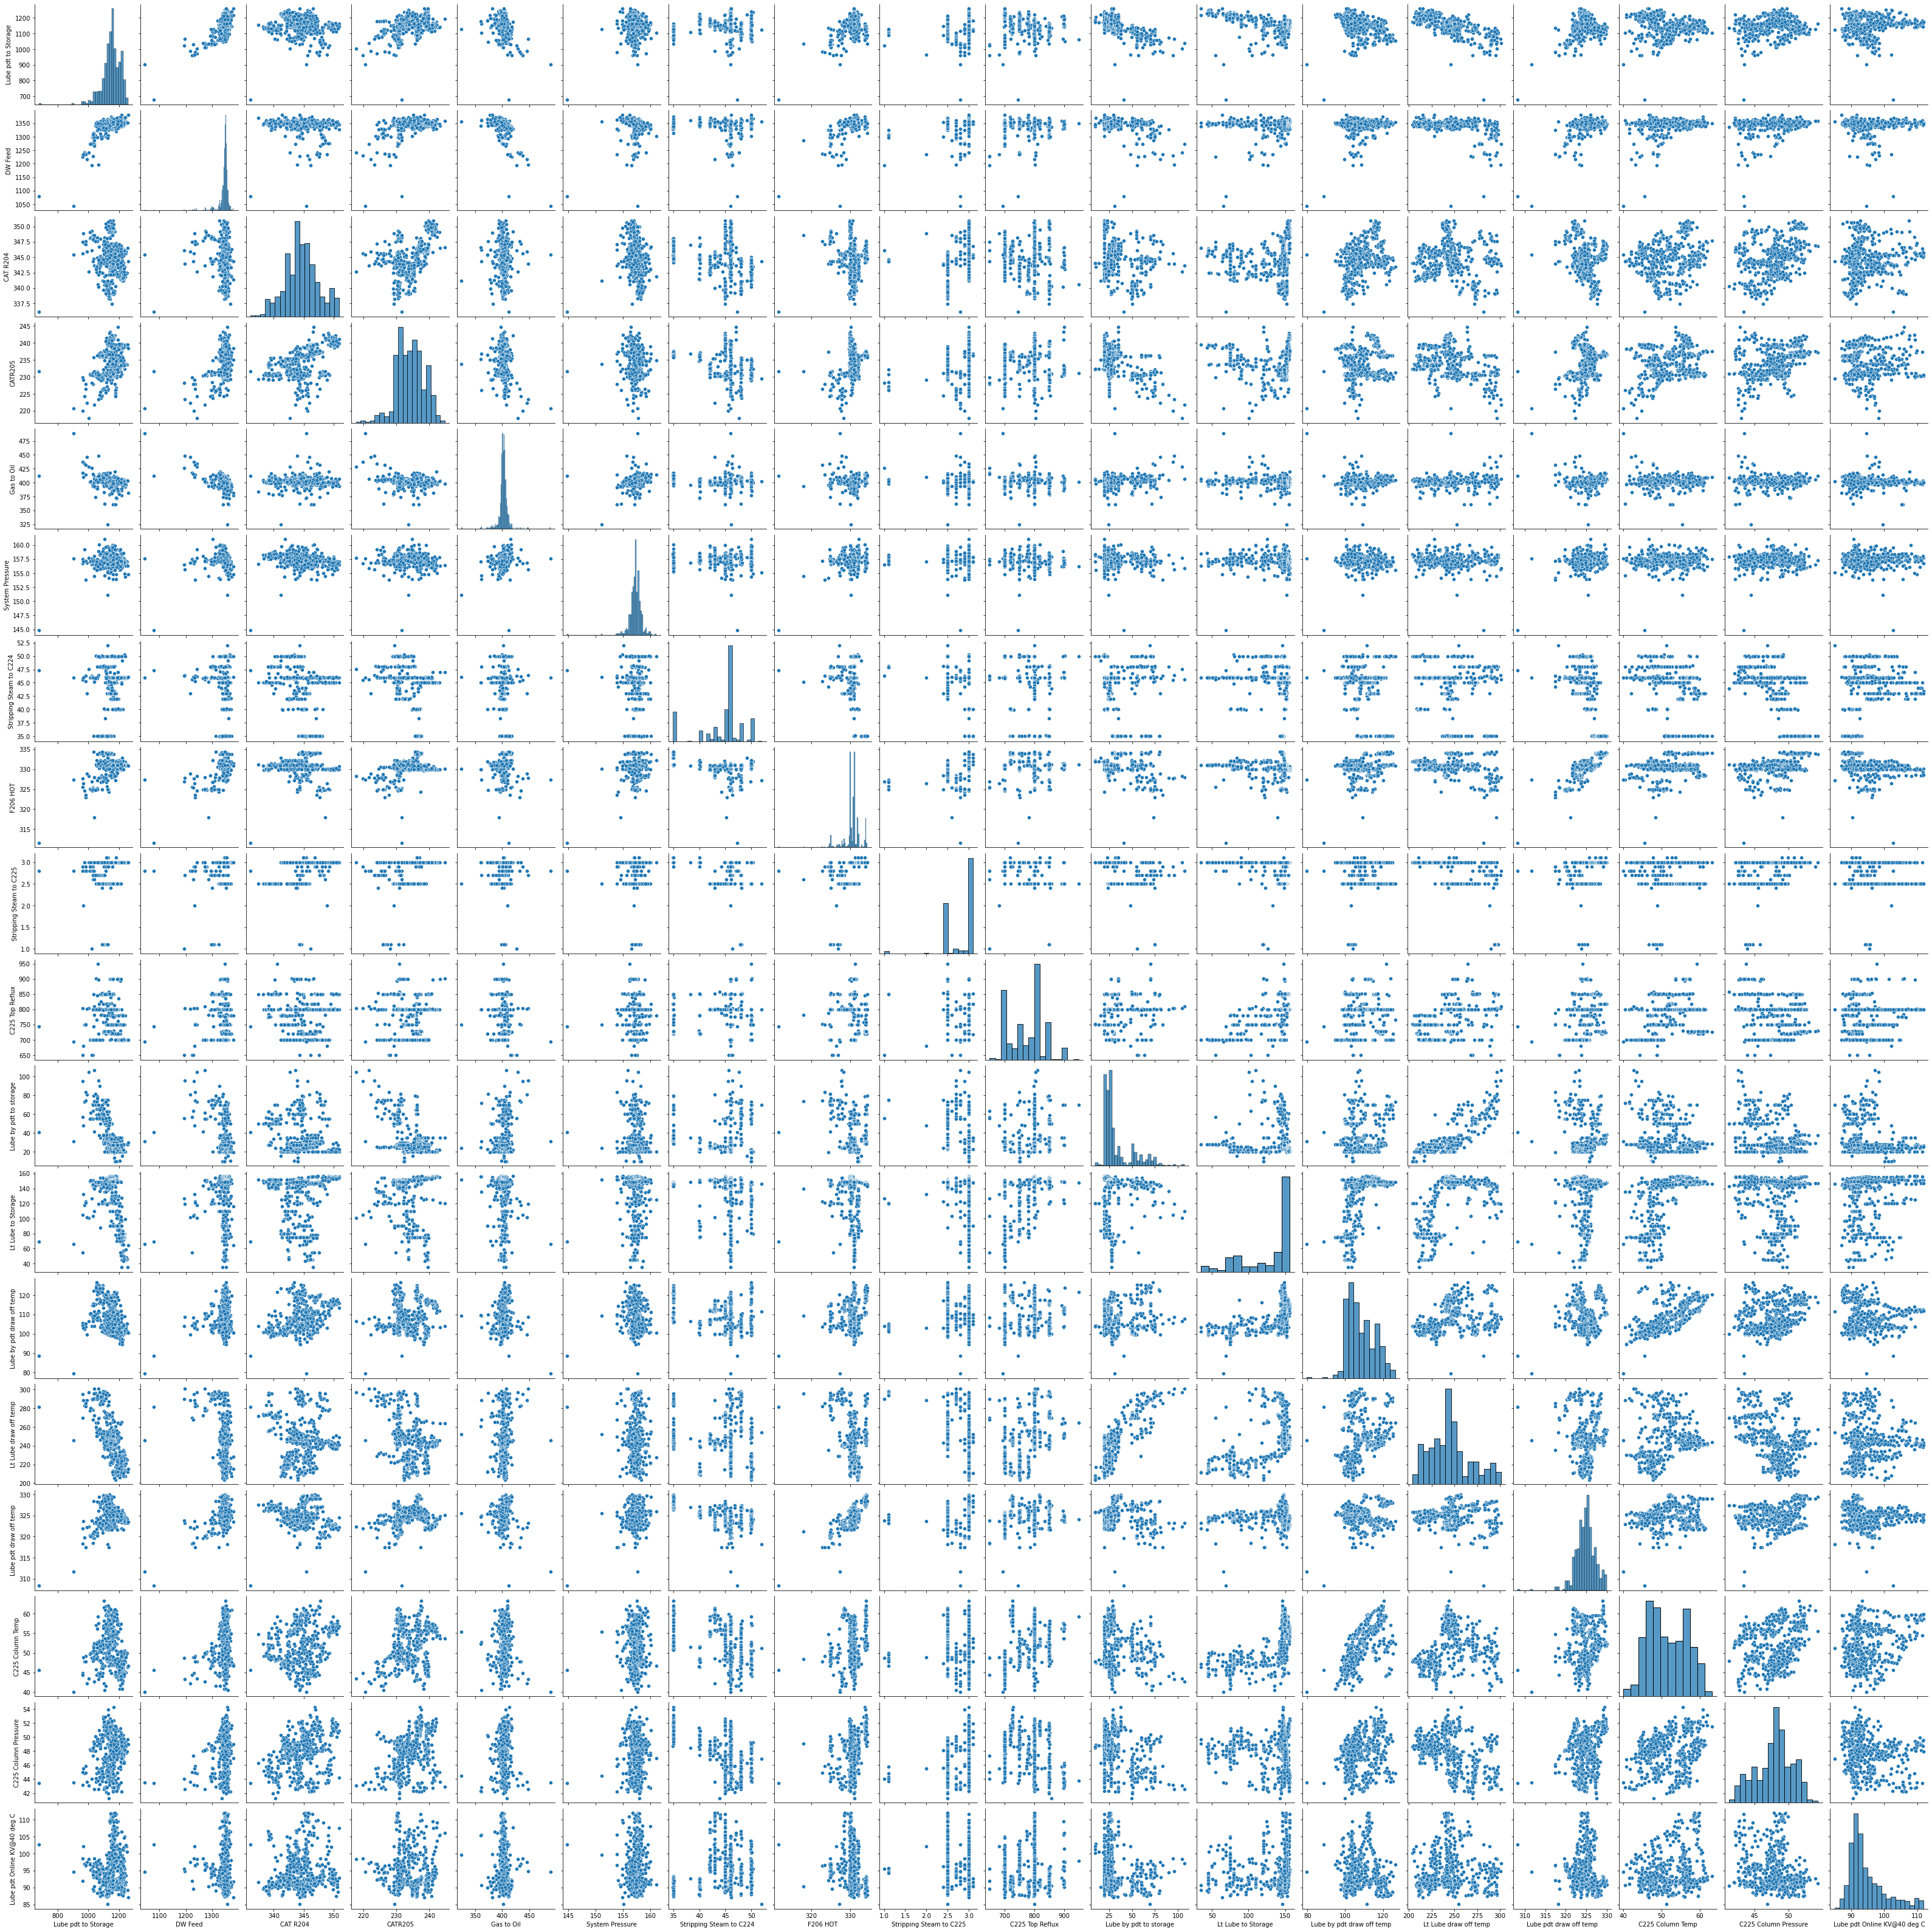

In [10]:
## Multivariate analysis

sns.pairplot(prod)

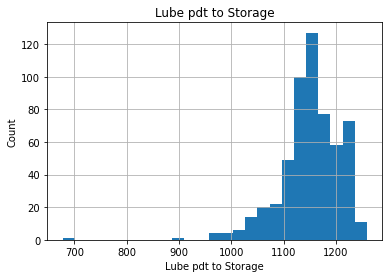

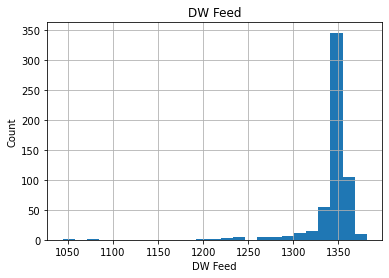

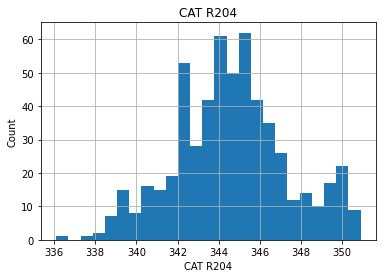

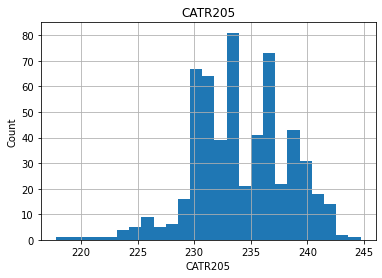

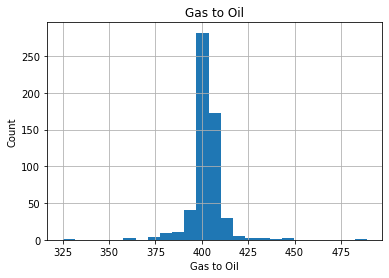

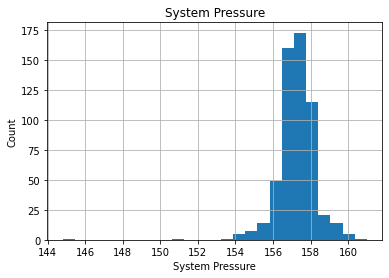

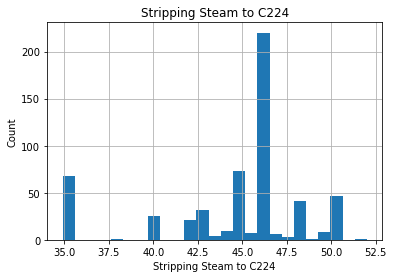

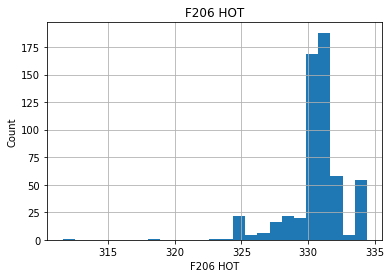

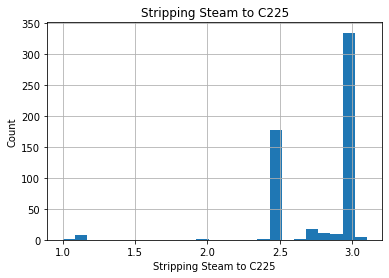

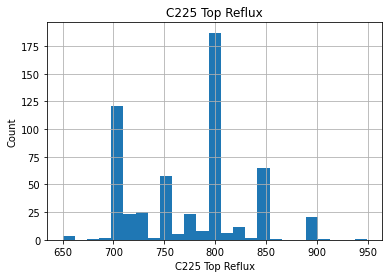

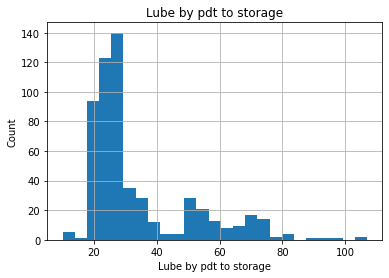

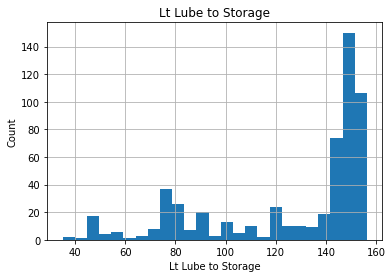

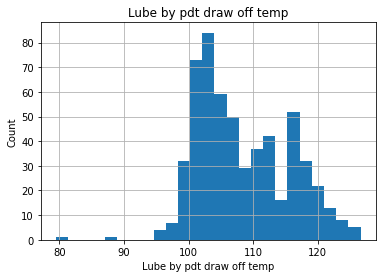

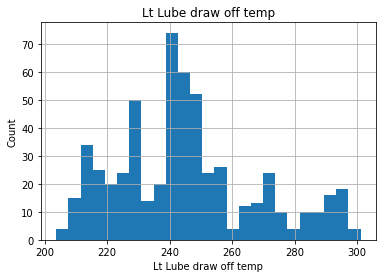

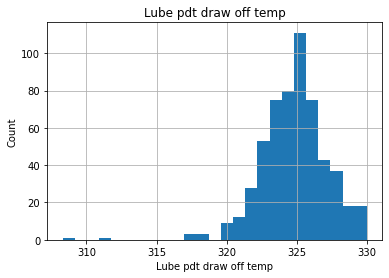

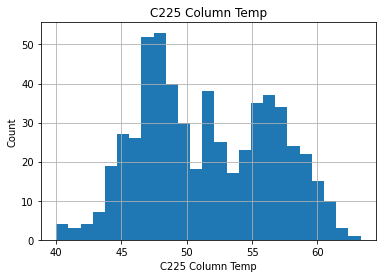

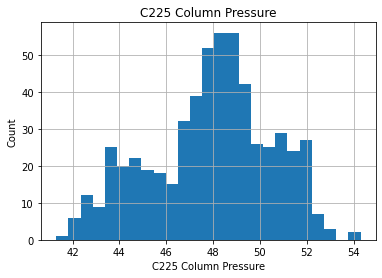

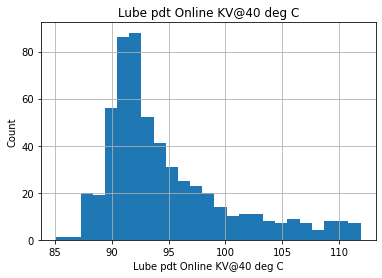

In [11]:
## Lets analyse the continuous values by creating histograms

for feature in prod.columns:
    data=prod.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [13]:
## Without Visualization
prod.corr()

,Lube pdt to Storage,DW Feed,CAT R204,CATR205,Gas to Oil,System Pressure,Stripping Steam to C224,F206 HOT,Stripping Steam to C225,C225 Top Reflux,Lube by pdt to storage,Lt Lube to Storage,Lube by pdt draw off temp,Lt Lube draw off temp,Lube pdt draw off temp,C225 Column Temp,C225 Column Pressure,Lube pdt Online KV@40 deg C
Lube pdt to Storage,1.000000,0.657797,-0.110772,0.364597,-0.314013,0.140248,0.105202,0.414775,0.271162,-0.260515,-0.661416,-0.492025,-0.318790,-0.710486,0.255789,-0.127539,0.144654,0.046727
DW Feed,0.657797,1.000000,-0.085994,0.406155,-0.546843,0.131245,-0.111754,0.581822,0.174944,0.102524,-0.429738,0.064553,0.177864,-0.386812,0.505497,0.225261,0.231983,-0.043367
CAT R204,-0.110772,-0.085994,1.000000,0.497232,-0.000586,-0.180871,-0.228993,-0.103246,0.324209,-0.042383,-0.159014,0.110804,0.407255,-0.087113,-0.307714,0.249771,0.370995,0.059960
CATR205,0.364597,0.406155,0.497232,1.000000,-0.199877,-0.147138,-0.266859,0.372658,0.519862,-0.116128,-0.522001,-0.144934,0.113981,-0.421718,0.166651,0.159577,0.366983,-0.073137
Gas to Oil,-0.314013,-0.546843,-0.000586,-0.199877,1.000000,0.243675,-0.112105,0.038448,0.022820,-0.092868,0.179439,-0.060194,0.001514,0.102830,-0.056322,-0.083990,0.031758,-0.065069
System Pressure,0.140248,0.131245,-0.180871,-0.147138,0.243675,1.000000,-0.030664,0.278920,-0.082304,0.044404,-0.036729,0.033340,-0.121594,-0.026229,0.342600,0.002055,0.016440,-0.012391
Stripping Steam to C224,0.105202,-0.111754,-0.228993,-0.266859,-0.112105,-0.030664,1.000000,-0.422661,-0.228094,-0.029748,0.058966,-0.198562,-0.329137,-0.050678,-0.509057,-0.362586,-0.524009,0.182532
F206 HOT,0.414775,0.581822,-0.103246,0.372658,0.038448,0.278920,-0.422661,1.000000,0.351381,-0.055798,-0.331215,-0.058386,0.174357,-0.356884,0.772418,0.102473,0.321377,-0.239112
Stripping Steam to C225,0.271162,0.174944,0.324209,0.519862,0.022820,-0.082304,-0.228094,0.351381,1.000000,-0.409666,-0.417514,-0.331734,-0.058628,-0.521658,0.060697,-0.220871,0.435435,-0.174591
C225 Top Reflux,-0.260515,0.102524,-0.042383,-0.116128,-0.092868,0.044404,-0.029748,-0.055798,-0.409666,1.000000,0.190199,0.661492,0.262132,0.463338,0.092934,0.494306,-0.284274,0.079494


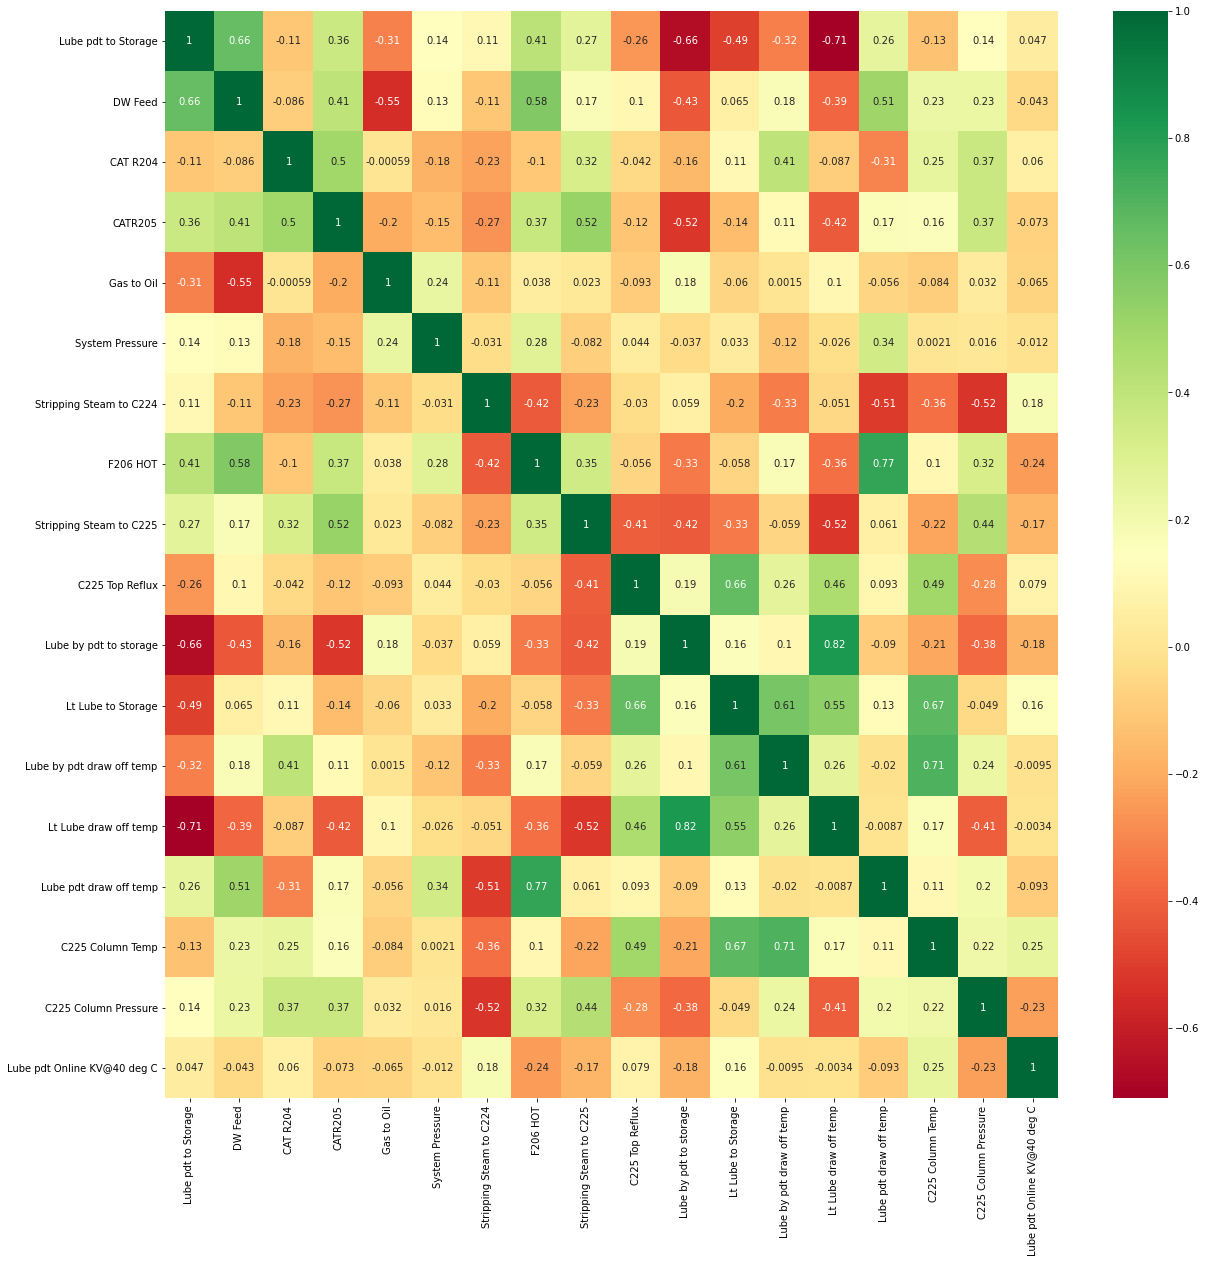

In [14]:
## Pearson Corelation using heatmap
corrmat = prod.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(prod[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Train Test Split

In [16]:
X_prod=prod.iloc[:,1:]
y_prod=prod.iloc[:,0]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_prod, y_prod, random_state=0)

# K Nearest Neighbors Regressor Model

In [21]:
from sklearn.neighbors import KNeighborsRegressor


knnreg=KNeighborsRegressor(n_neighbors=3)

knnreg.fit(X_train,y_train)

y_pred= knnreg.predict(X_test)

score= r2_score(y_test, y_pred)

error1= mean_squared_error(y_test,y_pred)
error2= mean_squared_error(y_test,y_pred, squared=False)
error3= mean_absolute_error(y_test,y_pred)

print('Evaluating the regression model:\n')
    

print('The R Square score for K Neighbors Regressor is {:.2f}'.format(score))
print('The mean_squared_error for K Neighbors Regressor using Ordinary Least Square is {:.2f}'.format(error1))
print('The root_mean_squared_error for K Neighbors Regressor using Ordinary Least Square is {:.2f}'.format(error2))
print('The mean_absolute_error for K Neighbors Regressor using Ordinary Least Square is {:.2f}\n'.format(error3))

print('Prediction Example:\n')

o= knnreg.predict([[1350,347,230,400,157,46,330,2.5,800,20,150,103,260,326,50,48,95]])

z= knnreg.predict([[1350,343,230,410,158,46,333,2.5,800,20,150,103,260,326,50,48,95]])

for x in o:
    print('The Predicted Lube 500N Production for the desired parameters is {:.2f}'.format(x))
    print('The Predicted yield that we get from the predicted production is around {:.2f}'.format((x/1350)*100))
    
for x in z:
    print('The Predicted Lube 500N Production for the desired parameters (optimised parameters) is {:.2f}'.format(x))
    print('The Predicted yield that we get from the predicted production is around {:.2f}'.format((x/1350)*100))

Evaluating the regression model:

The R Square score for K Neighbors Regressor is 0.91
The mean_squared_error for K Neighbors Regressor using Ordinary Least Square is 298.67
The root_mean_squared_error for K Neighbors Regressor using Ordinary Least Square is 17.28
The mean_absolute_error for K Neighbors Regressor using Ordinary Least Square is 12.64

Prediction Example:

The Predicted Lube 500N Production for the desired parameters is 1151.20
The Predicted yield that we get from the predicted production is around 85.27
The Predicted Lube 500N Production for the desired parameters (optimised parameters) is 1156.33
The Predicted yield that we get from the predicted production is around 85.65


# Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Linear Regression: Ordinary Least Squares Model

In [32]:
from sklearn.linear_model import LinearRegression

linreg= LinearRegression().fit(X_train,y_train)

y_pred= linreg.predict(X_test)

score= r2_score(y_test, y_pred)

error1= mean_squared_error(y_test,y_pred)
error2= mean_squared_error(y_test,y_pred, squared=False)
error3= mean_absolute_error(y_test,y_pred)

print('Evaluating the regression model:\n')
    

print('The R Square score for Linear Regression using Ordinary Least Square is {:.2f}'.format(score))
print('The mean_squared_error for Linear Regression using Ordinary Least Square is {:.2f}'.format(error1))
print('The root_mean_squared_error for Linear Regression using Ordinary Least Square is {:.2f}'.format(error2))
print('The mean_absolute_error for Linear Regression using Ordinary Least Square is {:.2f}\n'.format(error3))

print('The model coefficients are {}'.format(linreg.coef_))
print('The model intercept is {:.3f}\n'.format(linreg.intercept_))

Evaluating the regression model:

The R Square score for Linear Regression using Ordinary Least Square is 0.89
The mean_squared_error for Linear Regression using Ordinary Least Square is 334.74
The root_mean_squared_error for Linear Regression using Ordinary Least Square is 18.30
The mean_absolute_error for Linear Regression using Ordinary Least Square is 14.24

The model coefficients are [ 1.56602515e+00  4.03989912e+00 -2.96966530e+00  7.51934386e-01
  7.41876186e-01  7.58235754e-01 -1.65492878e+00 -1.23763012e+01
  3.11261721e-03 -2.31378001e+00 -1.13694662e+00 -6.81712451e-01
  8.21298381e-01  2.70038231e+00  3.07323665e-01 -2.42605666e+00
 -3.05468785e-01]
The model intercept is -2176.753



# Linear Regression: Ridge Model

In [1]:
from sklearn.linear_model import Ridge

linridge= Ridge(alpha=410).fit(X_train,y_train)

y_pred= linridge.predict(X_test)

score= r2_score(y_test, y_pred)

error1= mean_squared_error(y_test,y_pred)
error2= mean_squared_error(y_test,y_pred, squared=False)
error3= mean_absolute_error(y_test,y_pred)

print('Evaluating the regression model:\n')
    

print('The R Square score for Linear Regression using Ridge is {:.2f}'.format(score))
print('The mean_squared_error for Linear Regression using Ridge is {:.2f}'.format(error1))
print('The root_mean_squared_error for Linear Regression using Ridge is {:.2f}'.format(error2))
print('The mean_absolute_error for Linear Regression using Ridge is {:.2f}\n'.format(error3))

print('The model coefficients are {}'.format(linridge.coef_))
print('The model intercept is {:.3f}\n'.format(linridge.intercept_))

NameError: name 'X_train' is not defined

# Linear Regression: Lasso Model 

In [91]:
from sklearn.linear_model import Lasso

linlasso= Lasso(alpha=2).fit(X_train,y_train)

y_pred= linlasso.predict(X_test)

score= r2_score(y_test, y_pred)

error1= mean_squared_error(y_test,y_pred)
error2= mean_squared_error(y_test,y_pred, squared=False)
error3= mean_absolute_error(y_test,y_pred)

print('Evaluating the regression model:\n')
    

print('The R Square score for Linear Regression using Lasso is {:.2f}'.format(score))
print('The mean_squared_error for Linear Regression using Lasso is {:.2f}'.format(error1))
print('The root_mean_squared_error for Linear Regression using Lasso is {:.2f}'.format(error2))
print('The mean_absolute_error for Linear Regression using Lasso is {:.2f}\n'.format(error3))

print('The model coefficients are {}'.format(linlasso.coef_))
print('The model intercept is {:.3f}\n'.format(linlasso.intercept_))

print('Important Features that Lasso has selected for predicting the output variables are:\n')
for (e,k) in sorted (list(zip(list(X_prod), linlasso.coef_))):
    if k != 0:
        print('\t{}, {:.3f}'.format(e, k))

Evaluating the regression model:

The R Square score for Linear Regression using Lasso is 0.90
The mean_squared_error for Linear Regression using Lasso is 313.73
The root_mean_squared_error for Linear Regression using Lasso is 17.71
The mean_absolute_error for Linear Regression using Lasso is 13.37

The model coefficients are [ 1.55803401  2.3793069  -2.63249005  0.66727038  0.          0.37532799
  0.         -0.          0.01703643 -2.18161222 -1.07105358 -0.86914442
  0.87269477  0.          0.18649875 -1.60476338  0.02410508]
The model intercept is -1289.494

Important Features that Lasso has selected for predicting the output variables are:

	C225 Column Pressure, -1.605
	C225 Column Temp, 0.186
	C225 Top Reflux, 0.017
	CAT R204, 2.379
	CATR205, -2.632
	DW Feed, 1.558
	Gas to Oil, 0.667
	Lt Lube draw off temp, 0.873
	Lt Lube to Storage, -1.071
	Lube by pdt draw off temp, -0.869
	Lube by pdt to storage, -2.182
	Lube pdt Online KV@40 deg C, 0.024
	Stripping Steam to C224, 0.375


#### Observations: 

- RMSE comparsion between models: KNN detected 17.28 vs LR detected 18.30 vs Ridge detected 17.91 errors vs Lasso detected 17.71.
- KNN has a accuracy of 91% better than Ridge, Lasoo and LR (accuracy of Ridge and Lasso around 90% each and LR 89%)
- MSE and MAE of KNN is less as compared to all other models.
- So overall KNRegressor Method performed much better in determining the L500N Production.